## Library

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Data preparation

In [140]:
def get_column(data, index):
    result = [row[index] for row in data]
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    # get tv (index=0)
    tv_data = get_column(data, 0)

    # get radio (index=0)
    radio_data = get_column(data, 1)

    # get newspaper (index=0)
    newspaper_data = get_column(data, 2)

    # get sales (index=0)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X , y

In [142]:
X, y = prepare_data("advertising.csv")

# Linear regression

MSE = L = (y_hat - y)**2

### 2.1. Hoàn thành function initialize_params() để khởi tạo ngẫu nhiên giá trị ban đầu cho w1, w2, 
w3 theo gaussian random.gauss(mu=0.0, sigma=0.01) v  b = 0.

In [147]:
def initialize_params_normal():
    w1 = random.gauss(mu=0, sigma=0.01)
    w2 = random.gauss(mu=0, sigma=0.01)
    w3 = random.gauss(mu=0, sigma=0.01)
    b = 0
    return w1, w2, w3, b

def initialize_params():
    w1 , w2 , w3 , b = (0.016992259082509283 , 0.0070783670518262355 , -0.002307860847821344 , 0)
    return w1, w2, w3, b 

### 2.2. Hoàn thành function predict(x1, x2, x3, w1, w2, w3, b) để trả về kết quả dự đoán y tương 
ứn.g

In [150]:
def predict(x1, x2, x3, w1, w2, w3, b):
    result = w1*x1 + w2*x2 + w3*x3 + b
    return result

In [84]:
y = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5 , w3=0, b=0.5)
print(y)

1.0


Q2: a) 1.0

### 2.3 Hoàn thành function compute_loss(y_hat, y) để tính loss giữa kết quả dự đoán y_hat và giá trị thực y, sử dụng Mean Squared Error

In [88]:
def compute_loss_mse(y_hat, y):
    loss = (y_hat - y)**2
    return loss

In [90]:
l = compute_loss_mse(y_hat=1, y=0.5)
print(l)

0.25


Q3: a) 0.25

### 2.4 Hoàn thành function compute_gradient_wi(xi, y, y_hat)) để tính đạo hàm của hàm loss L = (y_hat − y)**2 theo wi và function compute_gradient_b(y, y_hat) để tính đạo hàm của hàm loss L = (ˆy − y)2 theo b.

In [94]:
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2*xi*(y_hat - y)
    return dl_dwi

def compute_gradient_b(y, y_hat):
    dl_db = 2 * (y_hat - y)
    return dl_db 

In [96]:
# MSE loss
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

-1.0


Q4: a) -1.0

In [99]:
g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


Q5: b) -3.0

### 2.5 Hoàn thành function update_weight_wi(wi, dl_dwi, lr) để cập nhật wi sau khi tính đạo làm hàm loss L theo wi, và function update_weight_b(b, dl_db, lr) để update bias (b) sau khi tính đạo làm hàm loss L theo b.

In [103]:
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr * dl_dwi
    return wi 
    
def update_weight_b(b, dl_db, lr):
    b = b - lr * dl_db
    return b 

In [105]:
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print(after_wi)

1.000005


Q6: a) 1.000005

In [108]:
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)
print(after_b)
print(after_wi)

0.50001
1.000005


Q7: a) 0.50001

### 2.6 Thực hiện huấn luyện data bằng cách gọi hàm implement_linear_regression(X, y) và vẽ đồ thị kết quả cho 100 giá trị loss đầu tiên (loss cho 100 lần cập nhật đầu tiên) như bên hình 3.

In [118]:
def implement_linear_regression(X_data, y_data, epoch_max = 50, lr = 1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mse(y, y_hat)

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # logging
            losses.append(loss)

    return (w1, w2, w3, b, losses)

In [154]:
X, y = prepare_data("advertising.csv")
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)

In [156]:
def visualize_loss(losses):  
    plt.plot(losses[:100])
    plt.xlabel("#iteration")
    plt.ylabel("Loss")
    plt.show()

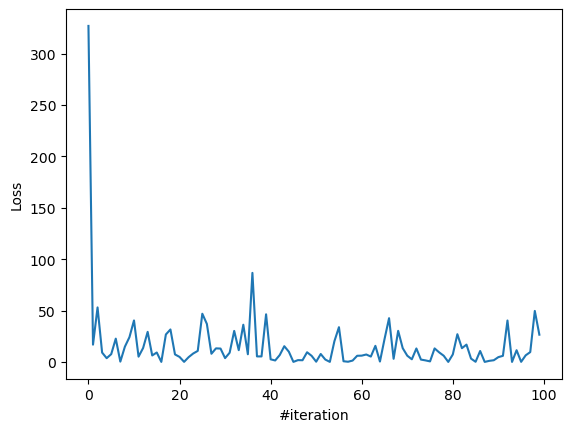

In [158]:
visualize_loss(losses)

In [160]:
print (w1 , w2 , w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


Q8: a) w1 = 0.074 , w2 = 0.15 , w3 = 0.17

In [163]:
tv = 19.2
radio = 35.9
newspaper = 51.3

In [165]:
X, y = prepare_data("advertising.csv")
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max=50 , lr=1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)

In [167]:
print(f"Predicted sales: {sales}")

Predicted sales: 8.176413319549823


Q9: b) predicted sales is 8.18

### 2.7 Thực hiện huấn luyện data bằng cách thay thế hàm loss L = (ˆy − y)2 bằng hàm loss MAE L = |yˆ − y| và vẽ đồ thị kết quả hàm loss trong 100 interation đầu tiên như bên hình 4.

In [171]:
def compute_loss_mae(y, y_hat):
    return np.abs(y_hat - y)

def compute_gradient_wi_mae(xi, y, y_hat):
    dl_dwi = np.sign(y_hat - y) * xi
    return dl_dwi

def compute_gradient_b_mae(y, y_hat):
    dl_db = np.sign(y_hat - y)
    return dl_db

def update_weight_wi_mae(w, dl_dw, lr):
    wi = w - lr * dl_dw 
    return wi 
    
def update_weight_b_mae(b, dl_db, lr):
    b = b - lr * dl_db
    return b 

In [173]:
def implement_linear_regression_MAE(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    
    w1, w2, w3, b = initialize_params()
    
    N = len(y_data)
    
    for epoch in range(epoch_max):
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            y = y_data[i]
            
            # MAE Loss
            loss = compute_loss_mae(y, y_hat)
            
            dl_dw1 = compute_gradient_wi_mae(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi_mae(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi_mae(x3, y, y_hat)
            dl_db = compute_gradient_b_mae(y, y_hat)
            
            w1 = update_weight_wi_mae(w1, dl_dw1, lr)
            w2 = update_weight_wi_mae(w2, dl_dw2, lr)
            w3 = update_weight_wi_mae(w3, dl_dw3, lr)       
            b = update_weight_b_mae(b, dl_db, lr)
            
            losses.append(loss)
            
    return (w1, w2, w3, b, losses)

In [175]:
(w1, w2, w3, b, losses) = implement_linear_regression_MAE(X, y)

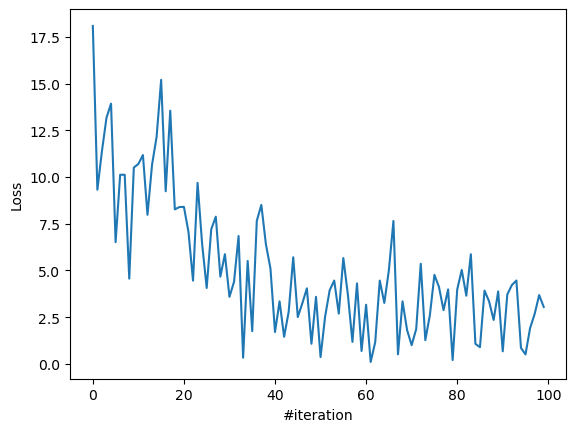

In [177]:
visualize_loss(losses)

In [181]:
l = compute_loss_mae(y_hat=1, y=0.5)
print (l)

0.5


Q10: a) 0.5